In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Question 1 Exploratory Data Analysis

* From example/input/ load compustat.csv inside compustat.zip  without unzip compustat.zip
* 1. Variable names that we are interested in:
    * sic code: four digits integer for company
    * datecqtr: year/ quarter time for the record
    * cusip: compustats identifier for a company
    * chod: shares out of standing (in million)
    * saleq: sales of current quarter (in million)
    * prccq: close price of current quarter (in dollar)
    
* 2. For saleq and market cap, compute the following:
    * Time series mean 
    * Time Series standard deviation
    * Time Series count of missing values
    * Time Series ratio of missing values
    * Aggregate the result in a dataframe
        
* 3. Answer the following questions:
    * Before computing any value, what kinds of descriptive analysis would you do to check if there are outliers?
    * Implement some schemes to detect outliers.
    * Do you find some outliers? Could you think why? You can do some research using google.
    * What kinds of conclusion you can get from analyzing the table you get in 2? You can make some plots to illustrate.

In [2]:
from zipfile import ZipFile
zip_data = ZipFile("C:\\Users\\Toby Jing\\Desktop\\Toby\\Toby\\Master\\Immersion\\Week5\\python-workshop-master (1)\\python-workshop-master\\session4\\example\\input\\compustat.zip")
f = zip_data.open('compustat.csv')
data = pd.read_csv(f)

In [3]:
data.columns

Index(['gvkey', 'datadate', 'fyearq', 'fqtr', 'indfmt', 'consol', 'popsrc',
       'datafmt', 'cusip', 'curcdq', 'datacqtr', 'datafqtr', 'cshoq', 'saleq',
       'costat', 'prccq', 'sic'],
      dtype='object')

In [4]:
data = data[["sic", "datacqtr", "cusip", "cshoq", "saleq", "prccq"]]
data.shape

(1811299, 6)

In [5]:
#Q2: Solution
data["mktcap"] = data["cshoq"] * data["prccq"] #Market Cap = No. Of Shares * Close Price
data.columns

Index(['sic', 'datacqtr', 'cusip', 'cshoq', 'saleq', 'prccq', 'mktcap'], dtype='object')

In [6]:
data.head()

,sic,datacqtr,cusip,cshoq,saleq,prccq,mktcap
0,3089.0,1966Q1,000032102,0.219,NaN,NaN,NaN
1,3089.0,1966Q2,000032102,0.219,NaN,NaN,NaN
2,3089.0,1966Q3,000032102,0.219,NaN,NaN,NaN
3,3089.0,1966Q4,000032102,0.219,4.032,NaN,NaN
4,3089.0,1967Q1,000032102,0.277,NaN,NaN,NaN


In [7]:
sales = data.pivot_table(values=['saleq'], index=['datacqtr'], columns=['sic'])
sales_summary = pd.concat([sales.mean(), sales.std(), sales.isnull().sum(), sales.isnull().sum() / sales.shape[0]], axis=1)
sales_summary.columns = ["Mean", "Standard Deviation", "Missing Value Count", "Missing Value Ratio"]
sales_summary.head()

Mean  Standard Deviation  Missing Value Count  \
      sic                                                          
saleq 100.0  210.761569          153.793232                   13   
      200.0   45.730984           57.098003                   80   
      700.0   69.080662           89.566404                   21   
      800.0   19.299191           20.465293                   53   
      900.0   11.289268            5.561760                  141   

             Missing Value Ratio  
      sic                         
saleq 100.0             0.054622  
      200.0             0.336134  
      700.0             0.088235  
      800.0             0.222689  
      900.0             0.592437

In [8]:
mktcap = data.pivot_table(values=['mktcap'], index=['datacqtr'], columns=['sic'])
mktcap_summary = pd.concat([mktcap.mean(), mktcap.std(), mktcap.isnull().sum(), mktcap.isnull().sum() / mktcap.shape[0]], axis=1)
mktcap_summary.columns = ["Mean", "Standard Deviation", "Missing Value Count", "Missing Value Ratio"]
mktcap_summary.head()

Mean  Standard Deviation  Missing Value Count  \
       sic                                                           
mktcap 100.0  1026.641305         1318.409211                   23   
       200.0   196.623839          293.130388                   82   
       700.0   437.762736          606.465125                   49   
       800.0   211.645994          246.173201                   64   
       900.0    20.414270            7.095283                  173   

              Missing Value Ratio  
       sic                         
mktcap 100.0             0.098291  
       200.0             0.350427  
       700.0             0.209402  
       800.0             0.273504  
       900.0             0.739316

In [9]:
final_result = pd.concat([sales_summary, mktcap_summary]) #Aggregate them into 1 dataframe
final_result

Mean  Standard Deviation  Missing Value Count  \
       sic                                                             
saleq  100.0     210.761569          153.793232                   13   
       200.0      45.730984           57.098003                   80   
       700.0      69.080662           89.566404                   21   
       800.0      19.299191           20.465293                   53   
       900.0      11.289268            5.561760                  141   
       1000.0    138.864482          124.434684                    4   
       1040.0     29.934386           16.634485                   19   
       1044.0      6.240967            4.638450                   22   
       1090.0     15.516840            9.831098                   34   
       1220.0    150.659496          114.447711                    5   
       1221.0    176.266895          206.627857                    5   
       1311.0    164.144059           95.387297                    2   
       1381.0    185.692195          188.833311                    4   
       1382.0     98.708876           47.750417                    3   
       1389.0    332.091749          251.646316                    4   
       1400.0    113.294800           93.685515                    4   
       1520.0     88.744489           84.928169                   38   
       1531.0    312.088871          394.915490                   21   
       1540.0    210.649587          111.315080                   27   
       1600.0    352.577404          246.082707                    4   
       1623.0    158.203084          193.513572                   32   
       1700.0     66.267351           79.050512                   27   
       1731.0    306.685628          410.150783                   20   
       2000.0   2194.469890         2062.985773                    1   
       2011.0   1292.063902         1216.362118                   13   
       2013.0    495.397362          340.115005                    3   
       2015.0    353.748445          366.151457                   23   
       2020.0    335.611330          425.106274                   22   
       2024.0     29.144757           36.840266                   81   
       2030.0    390.490497          286.623747                    1   
...                     ...                 ...                  ...   
mktcap 7996.0    869.737707          765.961752                   80   
       7997.0    573.572300          741.869577                  109   
       8000.0    125.265232          108.100317                   92   
       8011.0    436.043578          669.110980                   35   
       8050.0    578.226438          798.911842                   79   
       8051.0    344.922508          295.776049                   31   
       8060.0    395.980106          400.810620                   32   
       8062.0   2569.917673         3358.376748                   24   
       8071.0    599.737201         1205.207650                   28   
       8082.0    375.515204          714.967333                   47   
       8090.0    678.846472          755.827212                   45   
       8093.0    151.098135          123.418849                   82   
       8111.0   1605.330193         2361.507076                  135   
       8200.0    565.604428          544.157381                   24   
       8300.0    237.552174          234.310529                   81   
       8351.0   1187.989849         2035.978960                   98   
       8400.0      7.548196            4.995229                  219   
       8600.0    162.072623          207.234106                  216   
       8700.0   1083.074679         1831.463217                   17   
       8711.0    464.470540          546.626789                   27   
       8721.0   1810.799479         1587.784173                   37   
       8731.0    850.256128         1599.771797                   71   
       8734.0    143.100716          152.869490                

In [10]:
data.describe()

,sic,cshoq,saleq,prccq,mktcap
count,1.810931e+06,1.569058e+06,1.541801e+06,1.468061e+06,1.343023e+06
mean,4.837408e+03,1.463094e+02,4.451507e+02,2.304301e+01,2.057473e+03
std,2.092611e+03,4.153391e+04,2.679707e+03,5.266772e+02,1.320220e+04
min,1.000000e+02,0.000000e+00,-2.562300e+04,0.000000e+00,0.000000e+00
25%,3.312000e+03,4.152000e+00,3.210000e+00,3.000000e+00,2.000701e+01
50%,4.923000e+03,1.298600e+01,2.182500e+01,1.082000e+01,9.421800e+01
75%,6.722000e+03,4.236800e+01,1.305300e+02,2.381000e+01,5.257138e+02
max,9.998000e+03,2.597497e+07,2.073073e+05,1.416000e+05,1.540774e+06


## Q3: Solution

* (a): To check the outliers, I would compare the maximum and the minimum value with the mean to see whether the deviation is equal. I will also utilize the boxplot rule (1.5 * IQR)
    * For instance, cshoq has a mean level of 10^2 but its maximum is 10^7, which strongly suggests that outlier exists
    
* (b): We use the IQR and Mean Absolute Deviation method. There are other machine learning methods like isolation forest or DBScan cluster which are not implemented here
    * IQR method: It is considered as an outlier in the boxplot if it is smaller than Q1 - 1.5 * IQR or larger than Q3 + 1.5 * IQR where IQR = Q3 - Q1
    * MAD method: An outlier has value larger than median + 3 * MAD or smaller than median - 3 * MAD

In [11]:
sales_Q = sales.describe().loc[["25%", "75%"]]
IQR = sales_Q.loc["75%"] - sales_Q.loc["25%"]
IQR

       sic   
saleq  100.0      163.571081
       200.0       63.307688
       700.0       97.830833
       800.0       14.759750
       900.0        4.352000
       1000.0     156.438528
       1040.0      24.572712
       1044.0       7.068646
       1090.0      13.541874
       1220.0     151.963288
       1221.0     302.577333
       1311.0     144.721206
       1381.0     212.158773
       1382.0      61.668707
       1389.0     312.501527
       1400.0      97.791449
       1520.0     122.793125
       1531.0     402.188071
       1540.0     154.166143
       1600.0     382.972772
       1623.0     296.409123
       1700.0      61.124708
       1731.0     304.483536
       2000.0    3033.500136
       2011.0    1773.003250
       2013.0     494.000448
       2015.0     428.914040
       2020.0     372.439967
       2024.0      36.627167
       2030.0     253.685603
                    ...     
       7996.0     200.457500
       7997.0     112.959250
       8000.0      32.014667


In [12]:
sale_outlier_IQR = sales[~((sales_Q.loc["25%"] - 1.5 * IQR < sales) & (sales < sales_Q.loc["75%"] + 1.5 * IQR))]
sale_outlier_IQR.count() #The counting of outliners in each company

       sic   
saleq  100.0      8
       200.0      4
       700.0     15
       800.0     11
       900.0      6
       1000.0     9
       1040.0     1
       1044.0     4
       1090.0     0
       1220.0    10
       1221.0     0
       1311.0     2
       1381.0    15
       1382.0     8
       1389.0     1
       1400.0    18
       1520.0     3
       1531.0    18
       1540.0     3
       1600.0     0
       1623.0     0
       1700.0    22
       1731.0    22
       2000.0     2
       2011.0     2
       2013.0     0
       2015.0    11
       2020.0    17
       2024.0    10
       2030.0    21
                 ..
       7996.0     2
       7997.0     0
       8000.0     2
       8011.0    31
       8050.0    19
       8051.0     0
       8060.0    19
       8062.0    23
       8071.0     8
       8082.0     8
       8090.0     6
       8093.0     0
       8111.0     0
       8200.0     0
       8300.0     4
       8351.0    11
       8400.0     1
       8600.0     0
      

In [13]:
sales.describe()

saleq                                                             \
sic         100.0       200.0       700.0       800.0      900.0       1000.0   
count   225.000000  158.000000  217.000000  185.000000  97.000000  234.000000   
mean    210.761569   45.730984   69.080662   19.299191  11.289268  138.864482   
std     153.793232   57.098003   89.566404   20.465293   5.561760  124.434684   
min      57.326556    0.022500    1.014000    0.405500   2.062000   19.341000   
25%     108.528182    6.520937    3.796000    7.302250   8.095000   50.771344   
50%     153.344833   18.701125   20.356500   13.987500  10.504000   77.116667   
75%     272.099263   69.828625  101.626833   22.062000  12.447000  207.209872   
max    1047.078077  453.333000  346.393167  108.769000  32.441000  607.912637   

                                                         ...                   \
sic        1040.0      1044.0      1090.0      1220.0    ...           8721.0   
count  219.000000  216.000000  204.000000  233.000000    ...       214.000000   
mean    29.934386    6.240967   15.516840  150.659496    ...       278.140754   
std     16.634485    4.638450    9.831098  114.447711    ...       205.773564   
min      4.154667    0.000000    0.000000   18.100000    ...        13.500000   
25%     15.416500    2.090438    9.210443   60.874167    ...       129.524250   
50%     29.183667    6.097571   16.761961  103.861500    ...       247.110800   
75%     39.989212    9.159083   22.752317  212.837455    ...       349.578500   
max     88.055560   21.491364   39.527556  538.562810    ...      1130.900000   

                                                                      \
sic         8731.0      8734.0      8741.0       8742.0       8744.0   
count   164.000000  217.000000  198.000000   218.000000   216.000000   
mean    100.856041   31.772518  104.915638   174.285085    81.643552   
std     167.704723   38.387461  100.996158   421.850898   155.763764   
min       1.862111    1.235000    3.287000     1.107000     6.513000   
25%       4.349375    5.890000   25.610500    12.140148    17.476312   
50%      27.191923   17.440800   70.665100    20.265346    37.547833   
75%     102.628909   46.162000  150.315146   244.820408    58.435125   
max    1047.131667  172.205500  402.122375  5522.271000  1828.000000   

                                                       
sic       8900.0      9995.0        9997.0     9998.0  
count  42.000000  234.000000    234.000000  51.000000  
mean    1.911976   31.266904   6280.032904   0.435275  
std     3.136163   21.972147   5728.214729   1.205664  
min     0.000000    0.000000    652.700000   0.000000  
25%     0.082750   12.411153   1582.968083   0.000000  
50%     0.330000   27.861530   3220.928013   0.000000  
75%     2.477750   48.536565  10303.465775   0.000000  
max    10.644000  112.515552  19505.391000   4.964000  

[8 rows x 449 columns]

In [14]:
MAD = np.abs(sales - sales.mean()).mean()
sale_outlier_MAD = sales[np.abs(sales - sales.median()) > 3 * MAD] # 3 is a commonly used benchmark
sale_outlier_MAD.count() #The two method gives approximately the same amount of outliers

       sic   
saleq  100.0      8
       200.0      7
       700.0     21
       800.0     10
       900.0      6
       1000.0    13
       1040.0     4
       1044.0     4
       1090.0     0
       1220.0    16
       1221.0    17
       1311.0     6
       1381.0    17
       1382.0    10
       1389.0     6
       1400.0    18
       1520.0     8
       1531.0    19
       1540.0     9
       1600.0     1
       1623.0     7
       1700.0    19
       1731.0    18
       2000.0     6
       2011.0    10
       2013.0     7
       2015.0    15
       2020.0    13
       2024.0    12
       2030.0    19
                 ..
       7996.0    11
       7997.0     1
       8000.0     2
       8011.0    13
       8050.0    12
       8051.0    11
       8060.0    19
       8062.0    22
       8071.0    12
       8082.0    12
       8090.0    15
       8093.0     0
       8111.0     1
       8200.0     0
       8300.0     4
       8351.0     9
       8400.0     0
       8600.0     1
      

In [15]:
mktcap_Q = mktcap.describe().loc[["25%", "75%"]]
IQR = mktcap_Q.loc["75%"] - mktcap_Q.loc["25%"]
mktcap_outlier_IQR = mktcap[~((mktcap_Q.loc["25%"] - 1.5 * IQR < mktcap) & (mktcap < mktcap_Q.loc["75%"] + 1.5 * IQR))]
mktcap_outlier_IQR.count() #The counting of outliers in each company

        sic   
mktcap  100.0     12
        200.0     15
        700.0      7
        800.0      5
        900.0      0
        1000.0     8
        1040.0     6
        1044.0    10
        1090.0     2
        1220.0    17
        1221.0    10
        1311.0     0
        1381.0     3
        1382.0     7
        1389.0     0
        1400.0     7
        1520.0    23
        1531.0    12
        1540.0    10
        1600.0     6
        1623.0     0
        1700.0    21
        1731.0    15
        2000.0    34
        2011.0    25
        2013.0     0
        2015.0    28
        2020.0    28
        2024.0    19
        2030.0    19
                  ..
        7996.0     2
        7997.0     7
        8000.0     6
        8011.0    22
        8050.0    12
        8051.0     0
        8060.0    14
        8062.0     7
        8071.0     6
        8082.0    20
        8090.0     0
        8093.0     0
        8111.0     5
        8200.0     7
        8300.0     3
        8351.0    2

In [16]:
MAD = np.abs(mktcap - mktcap.mean()).mean()
mktcap_outlier_MAD = mktcap[np.abs(mktcap - mktcap.median()) > 3 * MAD]
mktcap_outlier_MAD.count() #The two method gives approximately the same amount of outliers

        sic   
mktcap  100.0     13
        200.0     13
        700.0     11
        800.0      6
        900.0      0
        1000.0    11
        1040.0    10
        1044.0    12
        1090.0     6
        1220.0    16
        1221.0    15
        1311.0     9
        1381.0    15
        1382.0     9
        1389.0     3
        1400.0     8
        1520.0    14
        1531.0     8
        1540.0    12
        1600.0    10
        1623.0    11
        1700.0    18
        1731.0    18
        2000.0    23
        2011.0    20
        2013.0     8
        2015.0    25
        2020.0    22
        2024.0    10
        2030.0    18
                  ..
        7996.0     6
        7997.0     8
        8000.0     6
        8011.0    16
        8050.0    12
        8051.0     5
        8060.0    16
        8062.0    12
        8071.0    11
        8082.0    11
        8090.0     7
        8093.0     1
        8111.0     7
        8200.0    11
        8300.0     8
        8351.0    1

## Q3 (c): 

* Below are the some plots of the companies that contain larger amount of outliers
    * In the first case, the company underwent a long growth period with a significant booming after the middle of the time period, so this is just a reflection a swift development
    * In the second case, the sales amount of the company fluctuates significantly, making a lot of outliers
* In conclusion, long-term significant growth and high fluctuations are basic causes for outliers (Assuming that there is no mis-input)

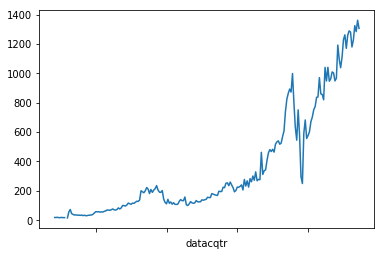

In [17]:
sales['saleq'][2015].plot()

C:\Users\Toby Jing\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


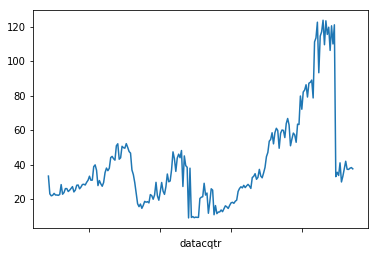

In [18]:
sales['saleq'][mktcap_outlier_IQR.count().argmax()[1]].plot()

## Q3 (d): The following observations can be made from the result

* From the plot of mean, it is obvious that different companies have significantly differnet sales and market cap values
* It seems that those companies with high mean also tend to have a higher standard deviation (rough result just from looking)
* Nearly all companies have missing values in the market cap, which is better for sales data
* There are several companies for which nearly all values are missing. Then the data from that period may not be very reliable

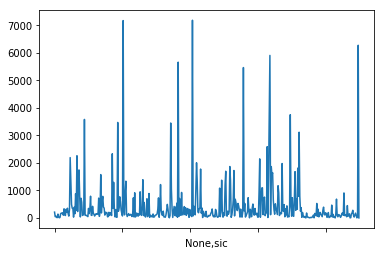

In [19]:
sales.mean().plot()

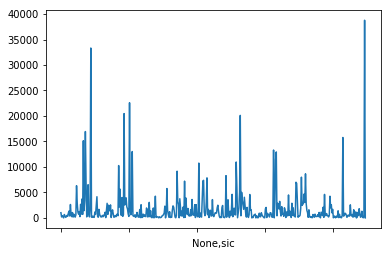

In [20]:
mktcap.mean().plot()

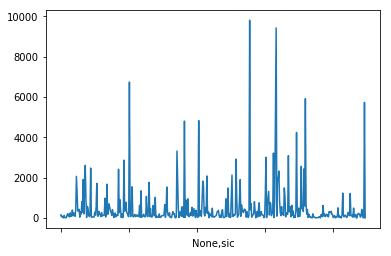

In [31]:
sales.std().plot()

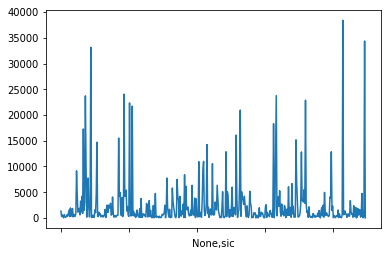

In [32]:
mktcap.std().plot()

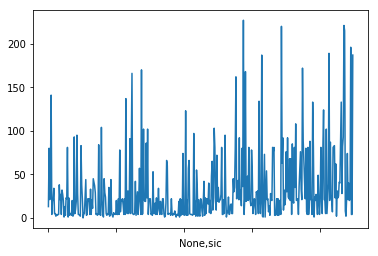

In [33]:
sales.isnull().sum().plot()

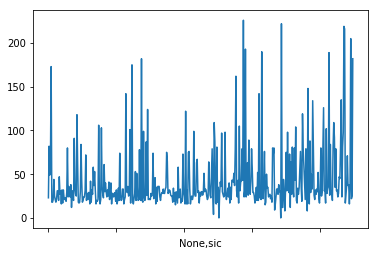

In [34]:
mktcap.isnull().sum().plot()

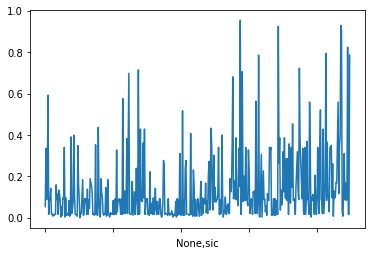

In [35]:
(sales.isnull().sum() / sales.shape[0]).plot()

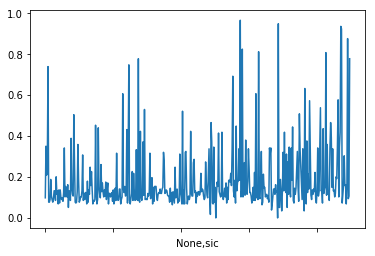

In [36]:
(mktcap.isnull().sum() / mktcap.shape[0]).plot()

# Question 2 Compute Industry Concentration

The defination of HHI index could be found: 

https://www.investopedia.com/terms/h/hhi.asp#:~:text=The%20Herfindahl%2DHirschman%20Index%20(HHI)%20is%20a%20commonly%20accepted,close%20to%20zero%20to%2010%2C000.

This index is used to measure the industry concentration and was used by congressman to determine whether to approve a merge deal or not.

Using the same data in question 1. Compute a panel data for HHI index for all industry, using a 2 digit SIC code.

Choose top 4 industry with the highest average HHI index, plot their time series pattern of HHI in a 2 by 2 figure.

In [21]:
data.columns

Index(['sic', 'datacqtr', 'cusip', 'cshoq', 'saleq', 'prccq', 'mktcap'], dtype='object')

In [22]:
data['sic2d'] = data['sic'] // 100 #Get the first 2 digits

In [23]:
panel = data.pivot_table(values=['saleq'], index=['datacqtr'], columns=['sic2d'], aggfunc=[np.sum])
HHI_denom = panel ** 2 #Calculate the denominator (sum(HHI) ** 2)

In [24]:
newdata = data.copy(deep=True)
newdata['saleq'] *= 100
newdata['saleq'] = newdata['saleq'] ** 2
HHI_numer = newdata.pivot_table(values=['saleq'], index=['datacqtr'], columns=['sic2d'], aggfunc=[np.sum]) #Calculate the numerator (sum((HHI * 100) ** 2))


In [25]:
HHI = HHI_numer / HHI_denom

In [26]:
HHI_average = HHI.mean()

In [27]:
HHI_average[HHI_average > 9999.9999] = np.nan
HHI_average = HHI_average.dropna() #Only consider industries with more than 1 company on average (thus exclude those with only one company in the industry always)
HHI_average[HHI_average.values.argsort()[-4:]]

            sic2d
sum  saleq  8.0      7018.726263
            81.0     9216.866804
            84.0     9686.244489
            9.0      9736.029362
dtype: float64

In [28]:
temp = HHI_average[HHI_average.values.argsort()[-4:]].index

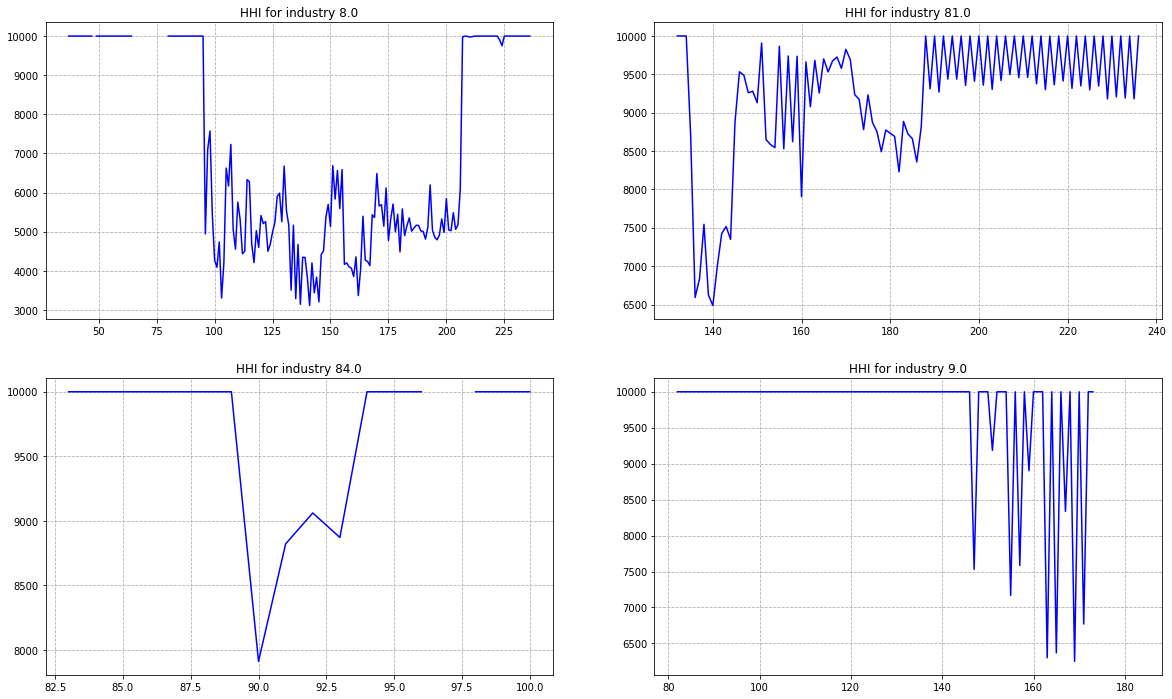

In [30]:
fig, ax = plt.subplots(2, 2, figsize = (20, 12))
for i in range(4):
    tempax = ax.ravel()[i]
    tempax.plot(HHI[temp[i]].values.tolist(), 'b-')
    tempax.set_title("HHI for industry " + str(temp[i][2]))
    tempax.grid(ls = '--')
    
plt.show()